# import Libraries

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# import the dataset

In [42]:
df = pd.read_csv('Iris.csv',index_col='Id')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [44]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## drop duplicates values

In [46]:
df.duplicated().sum()

3

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# label encoding

In [49]:
# the socond method is label encoding in sklearn
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

# this method assigns labels randomly so don't use it  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [50]:
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

## Iris-versicolor    == 1
## Iris-virginica     == 2
## Iris-setosa        == 0

# Modeling

In [51]:
x = df.drop('Species', axis=1)
y = df['Species']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [53]:
model = DecisionTreeClassifier(max_depth=2, min_samples_split=4)

model.fit(x_train.values, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=4)

In [54]:
from sklearn import tree
text_representation = tree.export_text(model)

In [55]:
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- class: 2



## accuracy score

In [56]:
accuracy_score(y_test, y_pred)

0.9

# Tree visualize .

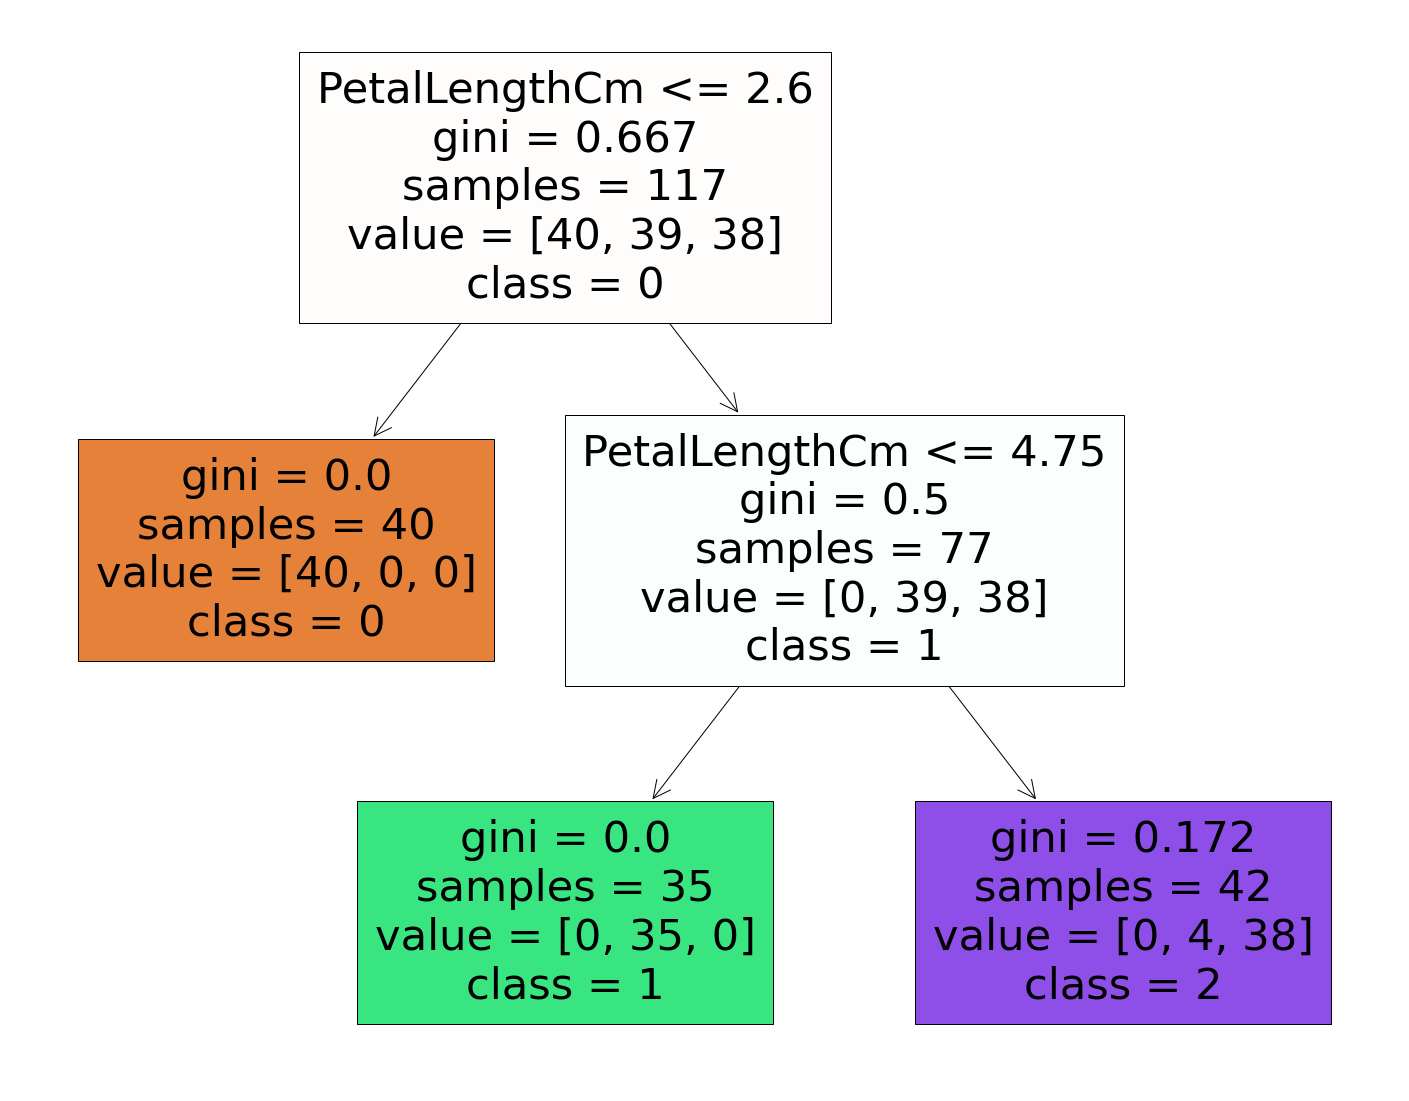

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names = df.columns,  class_names = ['0', '1','2'],filled = True)

## new data test

In [58]:
predictions = model.predict([[2.9,1.0,3.1,1]])
print(predictions)

[1]


In [61]:
predictions = model.predict([[5.0,3.6,1.4,0.2]])
print(predictions)

[0]
